# R-class 3 (2 hours) 

# Deliverable Ex. 2

Data: dat1.dat, dat2.dat, dat3.dat

Use several test seen in class to compare those data distributions

1. Do they have the same mean?
2. Do they have the same variance?
3. Are they compatible with being the same distribution?

Ho = both distributions have same mean/variance (the *interesting thing* is to be able to reject Ho...)

HA = (Alternative): both distributions have different mean/variance (mu1>mu2 o mu2>mu1)

P(Ho)= probability of being wrong if we reject Ho ~ probability of both distributions having same mean/variance...:

         * if they are equal P(Ho) ~ 1
         * if they are different P(Ho)~ 0 (I can reject Ho)

P(Ho) = *.test$p.value

P(Ho) = 2 * pt,f,..(t|f|?, nu,...)

**Note**: install 'pracma' for erf() and BSDA para z.test
        
        > conda install -c conda-forge r-pracma
    
        > conda install -c r r-bsda

**RANKS:**
    
```
    dat1r <-rank(dat12,ties.method="average")[1:N1]
    dat2r <-rank(dat12,ties.method="average")[(N1+1):N12]
```
**TESTS:**

    * t (Student) test: parametric test for the mean
        Statistic: t 
        Dof: nu 
        Two cases (sigmas are equal/different - aprox. Welch)
        Use t.test &&  2*pt (t,nu,..., inequality test)
        
        t.test(x, y = NULL, alternative = c("two.sided", "less", "greater"), mu = 0, paired=FALSE, 
                var.equal = FALSE, conf.level = 0.95)
        Then the null hypothesis of the two-tailed test is to be rejected if t ≤−tα∕2 or t ≥ tα∕2
        
    * F (isher) test: parametric test for the variance
        Use var.test  &&  2*pf (F, nu1, nu2,...,inequality test)
        Statistic: F
        Dof: nu1=N1-1; nu2=N2-1
        
    * Non-parametric test of the mean: t by ranks (rank summatory)     
        Use t.test(on ranks) && wilcox.test (test U from Wilcoxon-Mann-Whitney over original data)
        
    * Z test : Tests (parametric) for the variance for large N
        Use Z (from expression) && z.test
        Calculate Z=(SA -SB)/(SD/sqrt(2))
        P(HA) = erf(Z)
        P(Ho) = 1 - P(HA) = erfc(Z)
        
        We cannot reject H0 (equal variance) if Z~0
        
    * Test F over ranks ranks: Variance tests for large N
        Use P(H0)= var.test$p.value (over ranks)
                
    * K-S test: compare the full distribution
        Use ks.test$p.value

# Minimization and model fitting
1. Function roots (unidimensional case):

   * Polynomial roots: ```polyroot```
   
   * Non-polynomic functions roots: ```uniroot```
   
2. Maxima and minima searching (unidimensional): ```optimize```

3. Fit of unidimensional functions to a straight line:

   * By least squares: ```lm```
   
   * Minimizing distances: ```optimize```
   
4. Fit to unidimensional functions - multiparametric: ``optim``

In [17]:
library(repr) # resize plots
# Change plot size to 4 x 4
options(repr.plot.width=5, repr.plot.height=5)

## 1. Function roots (unidimensional case)
### a) Polynomial roots: ``polyroot``

1.- $f(x) = 3 + 2 x + x^2 = 0$

2.- $f(x) = (x-3)(x-{1\over2})(x+{1\over2})(x+4) = 3 - {1\over4} x - {49 \over 4} x^2 + x^3 + x^4$  (class ex.)

In [18]:
#Example 1
pol1 <- function(x) 3 + 2*x + x^2    # define polynomio
x <- seq(-100,100,by=0.1)
cat("Is it negative?", any(pol1(x) < 0), "\n")              # simple way to check if becomes negative
zeros <- polyroot(c(3,2,1))   # look for roots
print(zeros)                  # no real roots; only complex roots


Is it negative? FALSE 
[1] -1+1.414214i -1-1.414214i


---
---
### CLASS EXERCISE: 

$f(x) = (x-3)(x-{1\over2})(x+{1\over2})(x+4) = 3 - {1\over4} x - {49 \over 4} x^2 + x^3 + x^4$

### b) Non-poynomical functions: ``uniroot``
* Function values must have opposite signs in both edges of the interval to ensure that at least one root exists in the interval (Bolzano Theorem)

* Search is done in a **given interval** of the unidimensional argument of the function.
* It only finds one root

$f(x) = cos(x)-sin(2 x)$


$root
[1] 0.5235919

$f.root
[1] 1.034968e-05

$iter
[1] 8

$init.it
[1] NA

$estim.prec
[1] 6.103516e-05



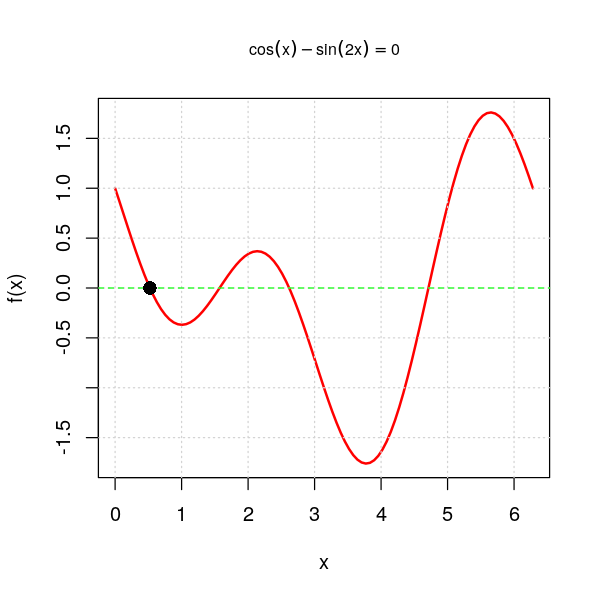

In [20]:
# define function
fcossin <- function(x) cos(x)-sin(2*x)
# plot it
curve(fcossin, col="red", xlim=c(0,2*pi),lwd=2, ylab="f(x)",
      main=expression(cos(x)-sin(2*x)==0), cex.main=0.8)
grid()
abline(h=0, col="green", lty=2)

# calculate first root in the interval [0,4]
zero <- uniroot(fcossin, lower=0, upper=4)
print(zero)

# plot result
points(zero$root, zero$f.root, pch=16, cex=1.5)


**Warning**: each call to ``uniroot`` only gives the **first** root! You must do as many call as roots you need to find (given the appropriate interval)

---
---
### CLASS EXERCISE: 

   Look for all the roots in 4 intervals

---
---

## 2. Maxima and minima search (unidimensional case)

* If the derivative is easy to calculate, then maxima/minima are the roots of the derivative (derivative=0)
* If the function is not unimodal (unique maximum/minimum) it cannot be ensured that the maximum/minimum found is a global one
* If the derivative cannot be analitically calculated: **``optimize``**: ``optimize$maximum``, ``optimize$minimum``, ``optimize$objective``

Minimum:
$minimum
[1] 1.00298

$objective
[1] -0.3690087

Maximum:
$maximum
[1] 2.138613

$objective
[1] 0.3690087



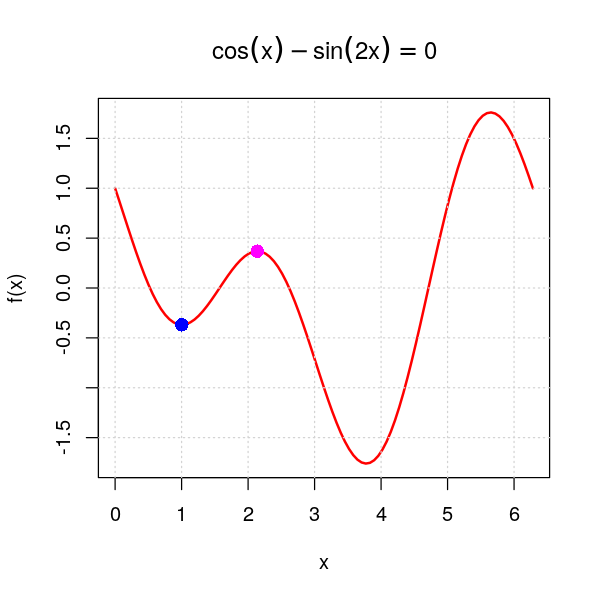

In [22]:
# Use function above and plot it
interval = c(0,pi)
#interval = c(0,2*pi)
#interval = c(0,8)
curve(fcossin, col="red", xlim=c(0,2*pi), lwd=2, ylab="f(x)",main=expression(cos(x)-sin(2*x)==0))
grid()

# calculate extreme (by default it is a minimum)
extreme <- optimize(fcossin, lower=interval[1], upper=interval[2])
points(extreme$minimum, extreme$objective, pch=16, cex=1.5, col="blue")
cat("Minimum:\n")
print(extreme)

# calculate maximum
extreme <- optimize(fcossin, lower=interval[1], upper=interval[2], maximum=TRUE)
points(extreme$maximum, extreme$objective, pch=16, cex=1.5, col="magenta") # it is not a global maximum
cat("Maximum:\n")
print(extreme)


## 3. Fit of unidimensional functions to a straight line (least squares fit)

### a) Using ``lm``

Let's fit a straight line to a sample of data in the file *hubble_data.txt* (on line platform "Aula Virtual").

The formula to use in **``lm``** can be:

$y \sim x$ for $ y = ax + b$
    
$y \sim x-1$ for $y = ax$

$y \sim 0 + x$ for $y = ax$

$y \sim 1$ for $y = ct$

In addition, errors can be taken into account in the fit (```weight``` = 1/var)

'data.frame':	24 obs. of  2 variables:
 $ distance          : num  0.032 0.034 0.214 0.263 0.275 0.275 0.45 0.5 0.5 0.63 ...
 $ recession.velocity: int  170 290 -130 -70 -185 -220 200 290 270 200 ...



Call:
lm(formula = hubble$recession.velocity ~ hubble$distance - 1)

Coefficients:
hubble$distance  
          423.9  



Call:
lm(formula = hubble$recession.velocity ~ hubble$distance - 1)

Residuals:
   Min     1Q Median     3Q    Max 
-411.5 -191.3   -7.1  128.0  496.1 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
hubble$distance   423.94      42.15   10.06 6.87e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 229 on 23 degrees of freedom
Multiple R-squared:  0.8147,	Adjusted R-squared:  0.8067 
F-statistic: 101.1 on 1 and 23 DF,  p-value: 6.869e-10


hubble$distance 
       423.9373 


[1] 0.032 0.034 0.214 0.263 0.275 0.275 0.450 0.500 0.500 0.630 0.800 0.900
[13] 0.900 0.900 0.900 1.000 1.100 1.100 1.400 1.700 2.000 2.000 2.000 2.000

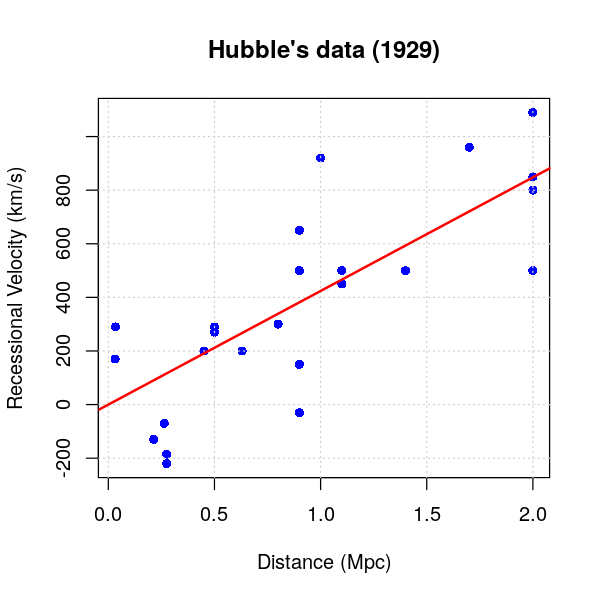

In [23]:
# read data 
hubble <- read.table("hubble_data.txt", header=TRUE)
str(hubble)

# plot data
plot(hubble, pch=16, col="blue", main="Hubble's data (1929)", 
     xlab="Distance (Mpc)", ylab="Recessional Velocity (km/s)")
grid()

# fit to a straight line using lm(..)
fit_lm <- lm(hubble$recession.velocity ~ hubble$distance-1) 
fit_lm
summary(fit_lm)
# show slope fitted value
print(fit_lm$coefficients)
hubble$distance
# plot fit line
abline(fit_lm, col="red", lwd=2)

### b) Alternative: Minimizing distances +  ```optimize```
We can have the same result using ``optimize``: create a function (sum of the squares of the distances to the line) that will be minimized and then look for squared the value of the minimizing slope

Minimum slope reached at: [1] 423.9373


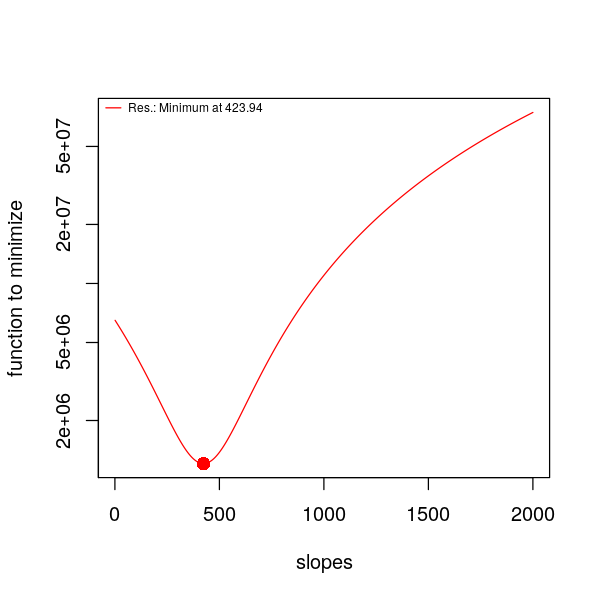

In [24]:
# function to minimize the sum of the distances, squared
fun.sum.residuals <- function(slope,x,y) {
    output <- sum((y-x*slope)^2)
    return(output)
}
# check slopes in [0,2000]
max.slope <- 2000
test.slopes <- numeric(max.slope)
residuals <- numeric(max.slope)
for (i in 1:max.slope) {
    test.slopes[i] <- i
    residuals[i] <- fun.sum.residuals(test.slopes[i], x=hubble$distance, y=hubble$recession.velocity)
}

# plot residuals for every value of the slope
plot(test.slopes, residuals, type="l", col="red", log="y", 
     xlab="slopes", ylab="function to minimize")
# calculate slope that minimize fun.sum.residuals
#        default: maximum=FALSE
#        otther remaining parameters needed (no to be minimized): x,y
opt <- optimize(fun.sum.residuals, lower=0, upper=1000,  x=hubble$distance, y=hubble$recession.velocity)
points(opt$minimum, opt$objective, pch=16, cex=1.5, col="red")
cat("Minimum slope reached at: ")
print(opt$minimum)

# plot legend
legend("topleft",  paste("Res.: Minimum at",round(opt$minimum,2)),
       lty=1,col=c("red","blue"), cex=0.6, bty="n")

---
---
### CLASS EXERCISE: 
Minimize the absolute value of the sum of the distances (instead of the sum of the squares of the distances) and plot the results in the same plot than the least squares minimization.
   

## 4. Fit to a unidimensional function (multiparametric)
To fit a function with more than 1 parameter, we can use the generic function **```optim```**. Warning! Do not confuse with **```optimize```**.

- Using this function requires having an initial approximated solution. 

- **```optim```** can use different methods to estimate the minimum. By default this is Nelder-Mead (1965), which only requires be able to calculate the function in several points (it is a robust method although it can be slow). More sofisticated methods need an evaluation of the function gradient.

- We will fit $f(x) = p_1 cos(p_2x) + p_2sin(p_1x)$

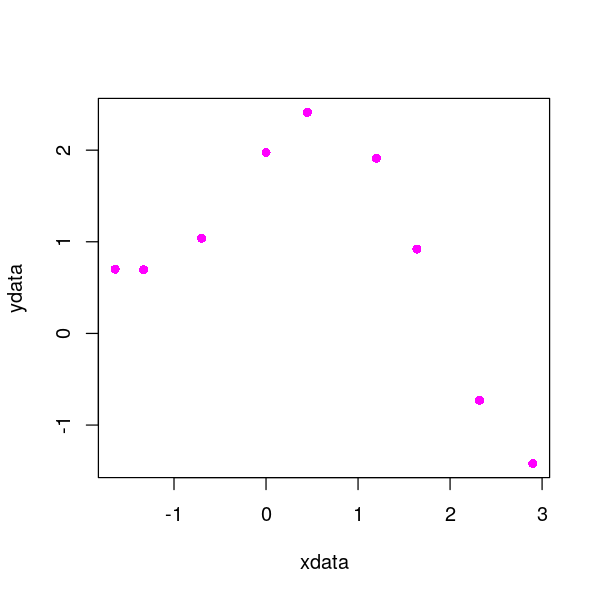

In [26]:
#                        PLOT DATA
# read data to be fitted
data <- read.table("dataOptize.txt", header=TRUE)
xdata <- data[,1]
ydata <- data[,2]
# have a look at it
plot(xdata,ydata,pch=16,col="magenta")



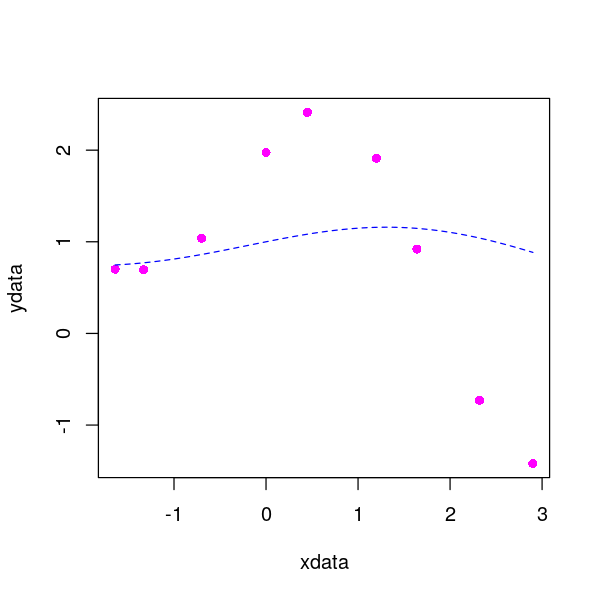

In [27]:
#           PLOT DATA + FUNCTION (with initial guesses)
plot(xdata,ydata,pch=16,col="magenta")
# initial function to be fitted (note that function returns a vector)
funp1p2 <- function(x,p1,p2) {
    n <- length(x)
    f <- numeric(n)
    f <- p1*cos(p2*x)+p2*sin(p1*x)
    return(f)
}
# some starting values + plot function for this selection
p1_init = 1.0
p2_init = 0.2
xp <- seq(min(xdata),max(xdata),length.out=1000)
yp <- funp1p2(xp,p1_init,p2_init)
lines(xp, yp, col="blue", lty=2)


In [28]:
#                 PLOT DATA AND MINIMIZE FUNCTION
#plot(xdata,ydata,pch=16,col="magenta")
#lines(xp, yp, col="blue", lty=2)

## function to be minimized
iter = 0
fun.to.minimize <- function(params,x,y) {
    iter <<- iter + 1
    p1 <- params[1]
    p2 <- params[2]
    output <- sum((y-funp1p2(x,p1,p2))^2)
    yp1p2 <- funp1p2(x,p1,p2)                  # additional line in green
    #lines(x, yp1p2, col="green", lwd=1) 
    return(output)
}

## using optim(...) to find best fit
solution <- optim(c(p1_init,p2_init), fun.to.minimize, x=xdata, y=ydata)
new.p1 <- solution$par[1]
new.p2 <- solution$par[2]

## plot solution
yp <- funp1p2(xp,new.p1,new.p2)
#lines(xp, yp, col="red", lwd=2)
#legend("bottomleft",c("initial guess","final fit"),lty=c(2,1),col=c("blue","red"),bty='n',cex=0.8)
#print(solution)


![No image, sorry](optim_movie.gif)

---
---
### CLASS EXERCISE: 

- Fit Hubble data to a line using optim (not adequate - 1 dim-, but possible)

---
---
### CLASS EXERCISE: fit to ~Gaussian line

1. Create 40 points between 3.4 and 5.2 following a Gaussian distribution (mean=4.27, sigma=0.34)

2. Move points "y" value a random quantity between -10% and 10% (uniform)

3. Give them a (uniform) error in [0.02, 0.05]

4. Plot points (with error bars) and the "theoretical" initial curve from which points are derived

5. Fit a gaussian minimizing $\chi^2$

6. Add fit plot